In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

In [2]:
dataset = pd.read_csv('customer_feedback_satisfaction.csv')

raw_dataset = dataset.copy()

In [3]:
dataset.shape

(38444, 11)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38444 entries, 0 to 38443
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         38444 non-null  int64  
 1   Age                38444 non-null  int64  
 2   Gender             38444 non-null  object 
 3   Country            38444 non-null  object 
 4   Income             38444 non-null  int64  
 5   ProductQuality     38444 non-null  int64  
 6   ServiceQuality     38444 non-null  int64  
 7   PurchaseFrequency  38444 non-null  int64  
 8   FeedbackScore      38444 non-null  object 
 9   LoyaltyLevel       38444 non-null  object 
 10  SatisfactionScore  38444 non-null  float64
dtypes: float64(1), int64(6), object(4)
memory usage: 3.2+ MB


In [5]:
dataset.isna().sum()

CustomerID           0
Age                  0
Gender               0
Country              0
Income               0
ProductQuality       0
ServiceQuality       0
PurchaseFrequency    0
FeedbackScore        0
LoyaltyLevel         0
SatisfactionScore    0
dtype: int64

In [6]:
dataset.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Country              0
Income               0
ProductQuality       0
ServiceQuality       0
PurchaseFrequency    0
FeedbackScore        0
LoyaltyLevel         0
SatisfactionScore    0
dtype: int64

In [7]:
dataset.drop(columns=['CustomerID'], inplace=True)

In [8]:
dataset.head()

,Age,Gender,Country,Income,ProductQuality,ServiceQuality,PurchaseFrequency,FeedbackScore,LoyaltyLevel,SatisfactionScore
0,56,Male,UK,83094,5,8,5,Low,Bronze,100.0
1,69,Male,UK,86860,10,2,8,Medium,Gold,100.0
2,46,Female,USA,60173,8,10,18,Medium,Silver,100.0
3,32,Female,UK,73884,7,10,16,Low,Gold,100.0
4,60,Male,UK,97546,6,4,13,Low,Bronze,82.0


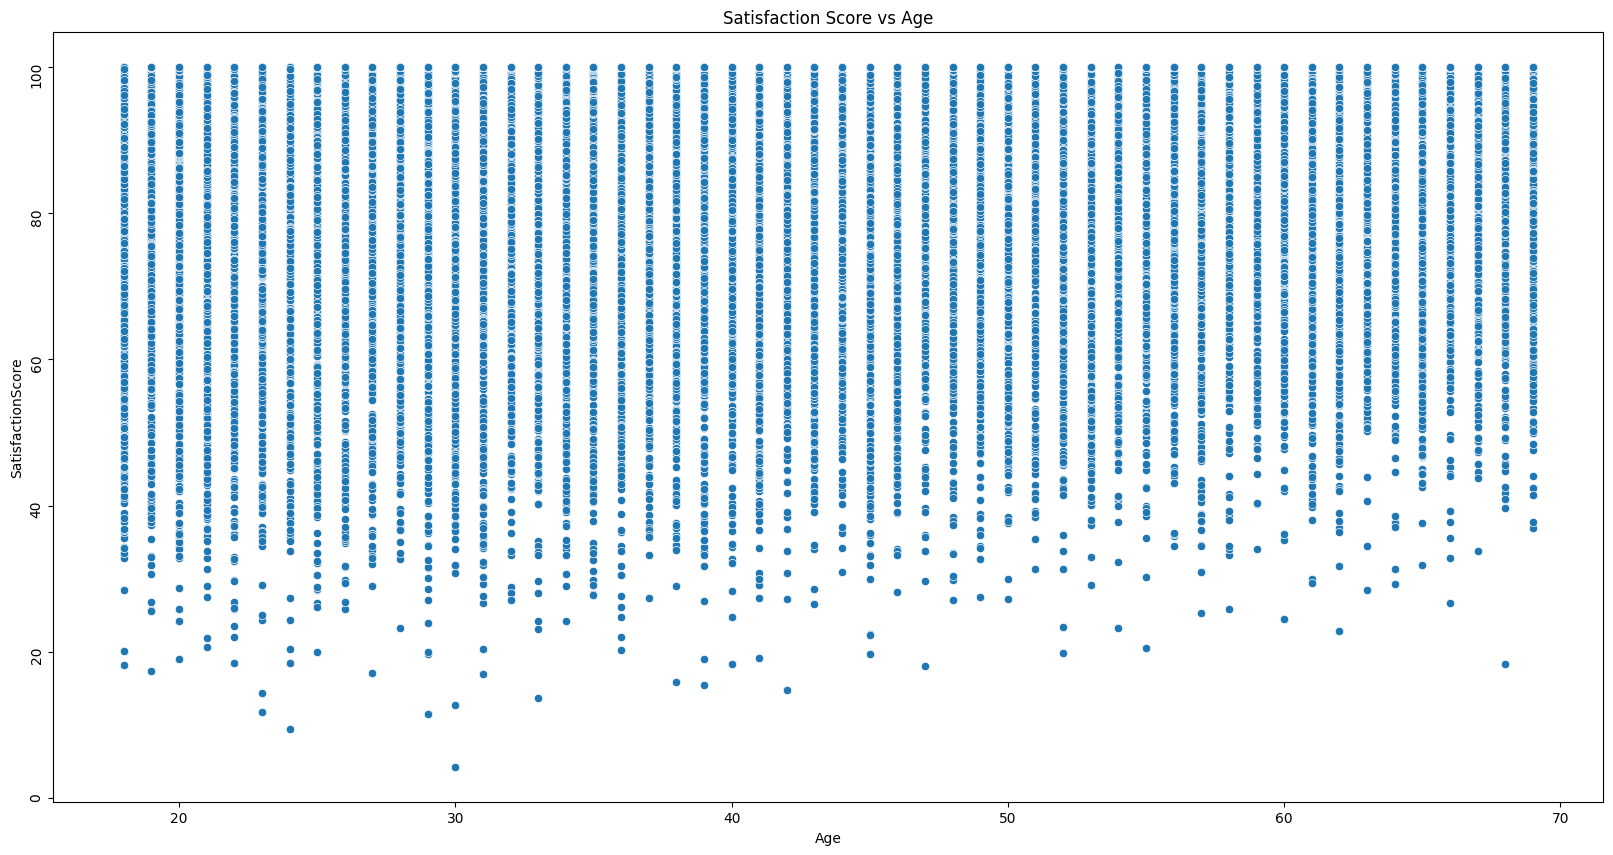

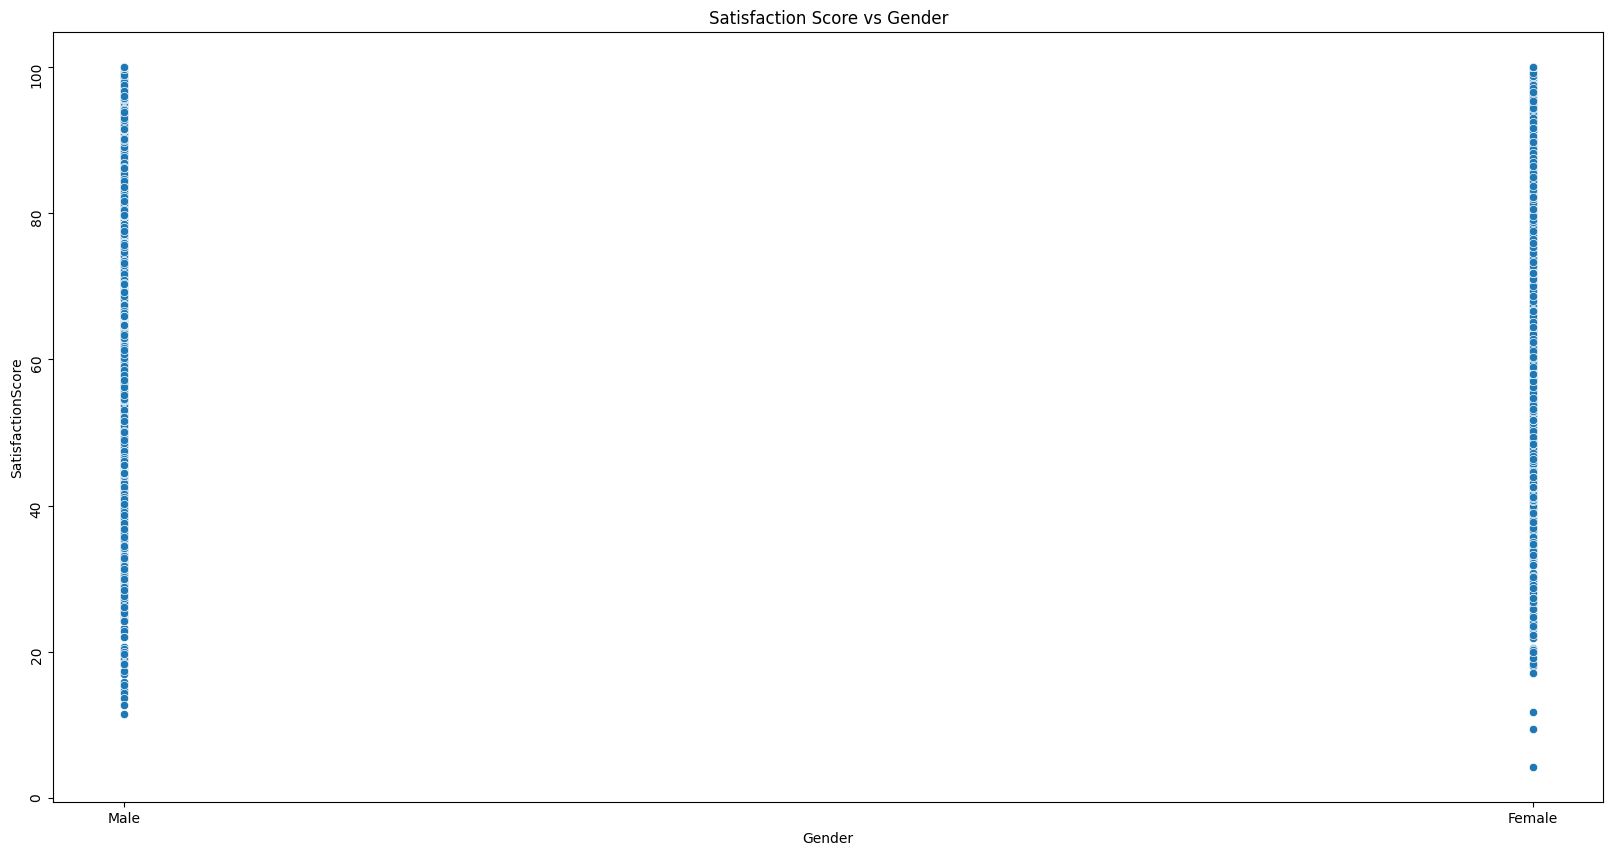

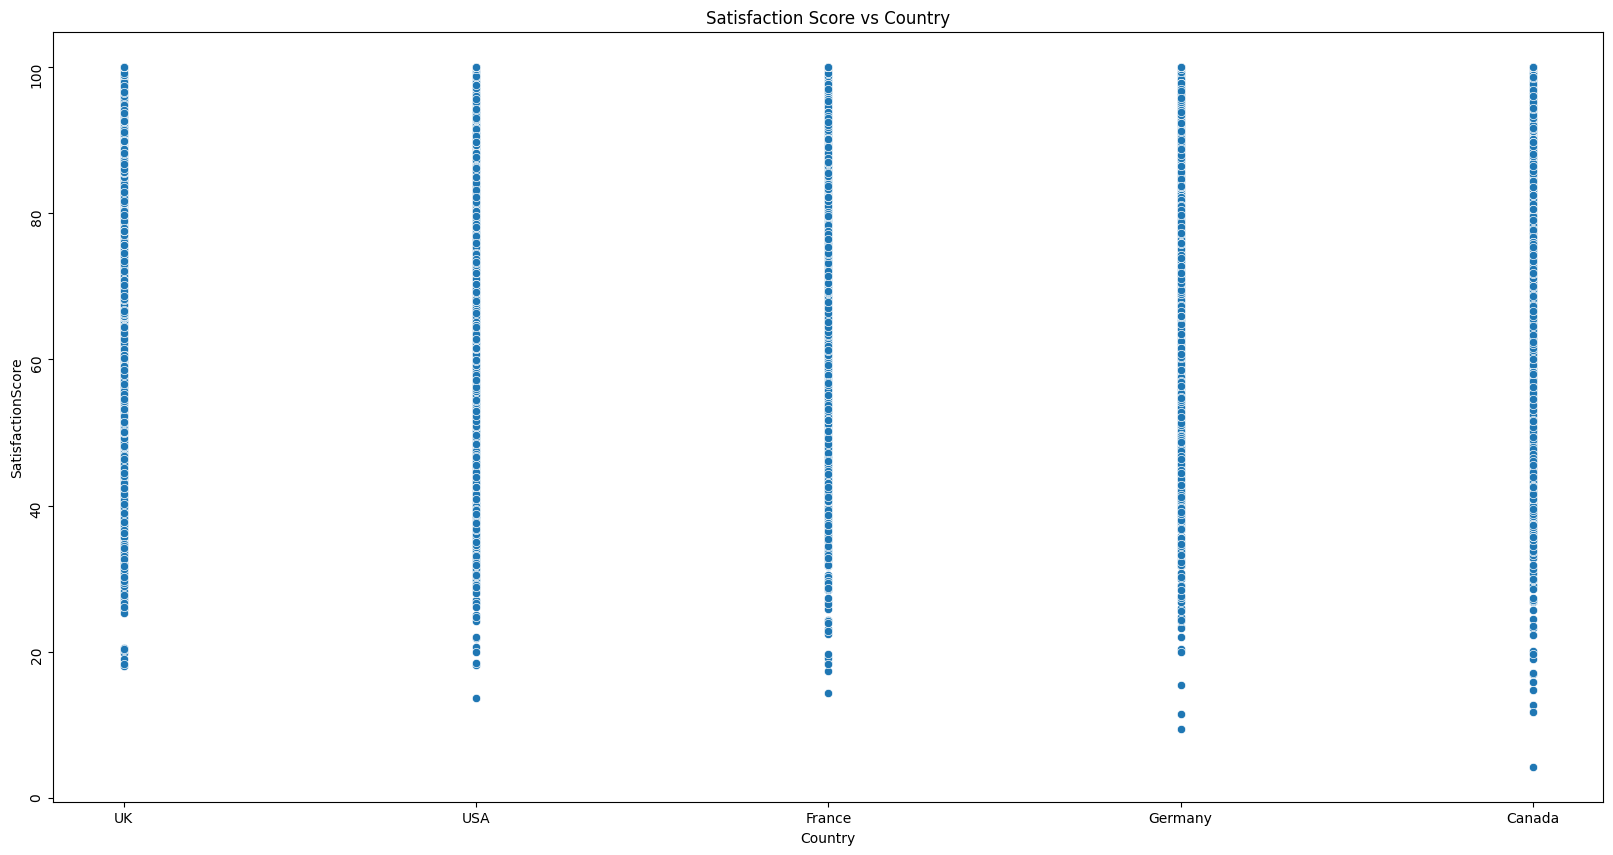

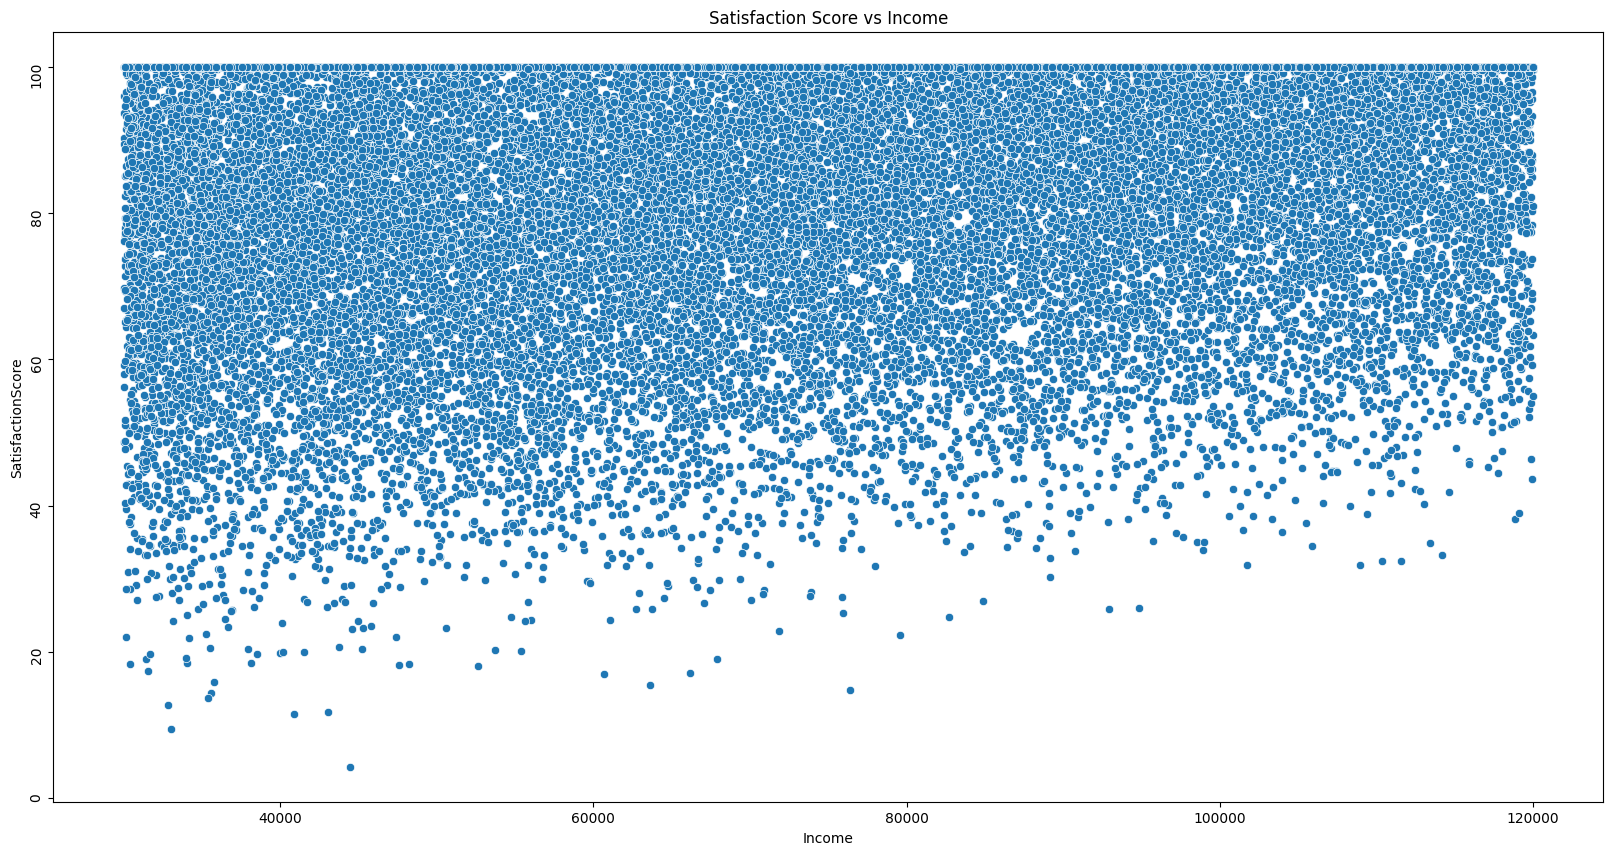

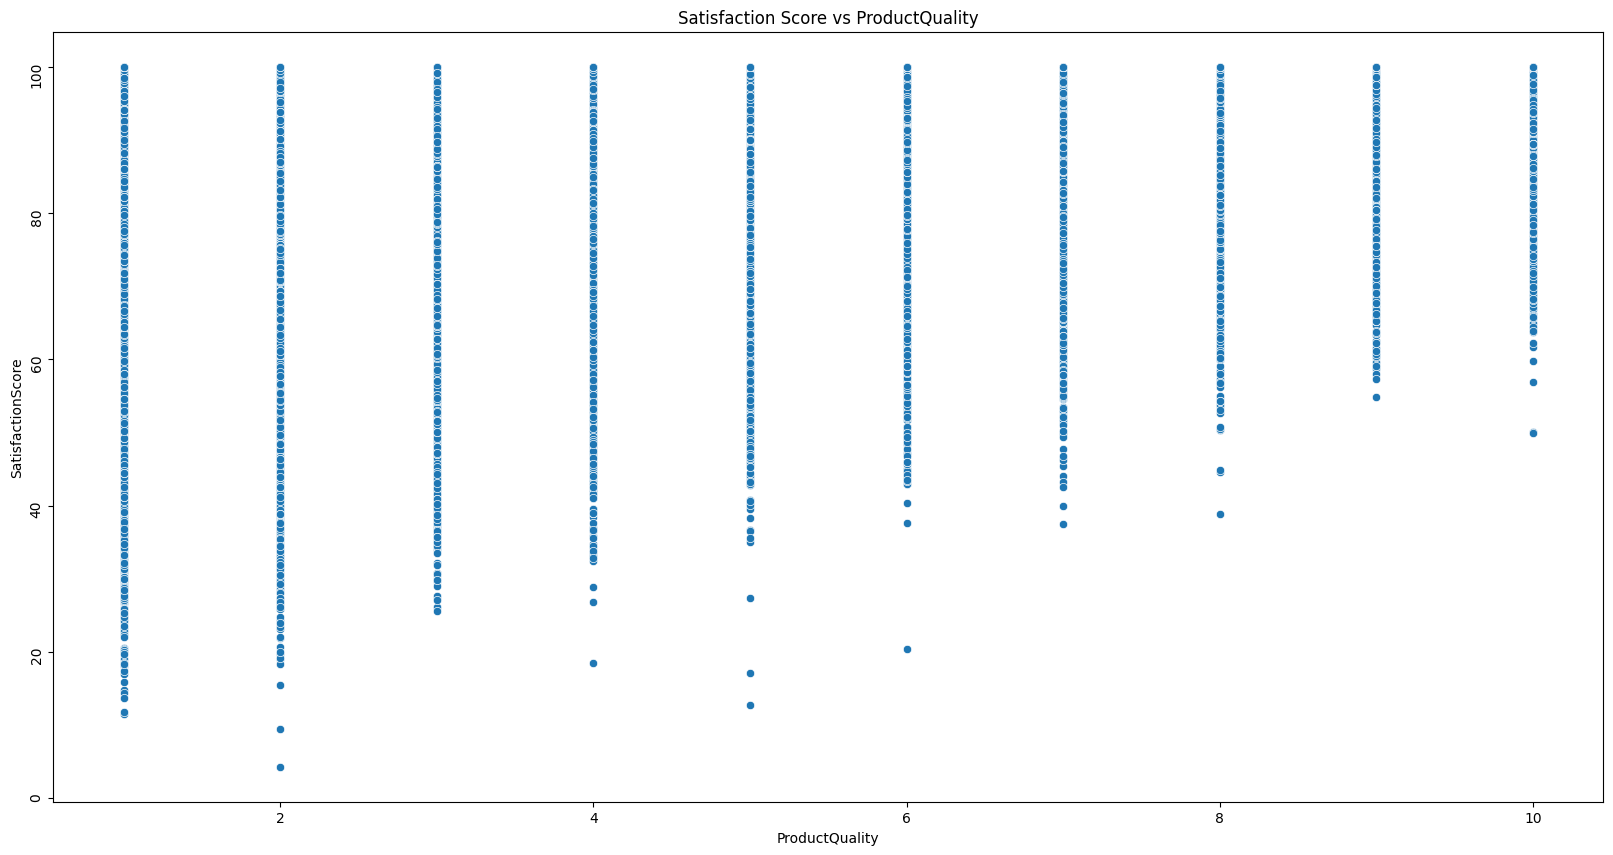

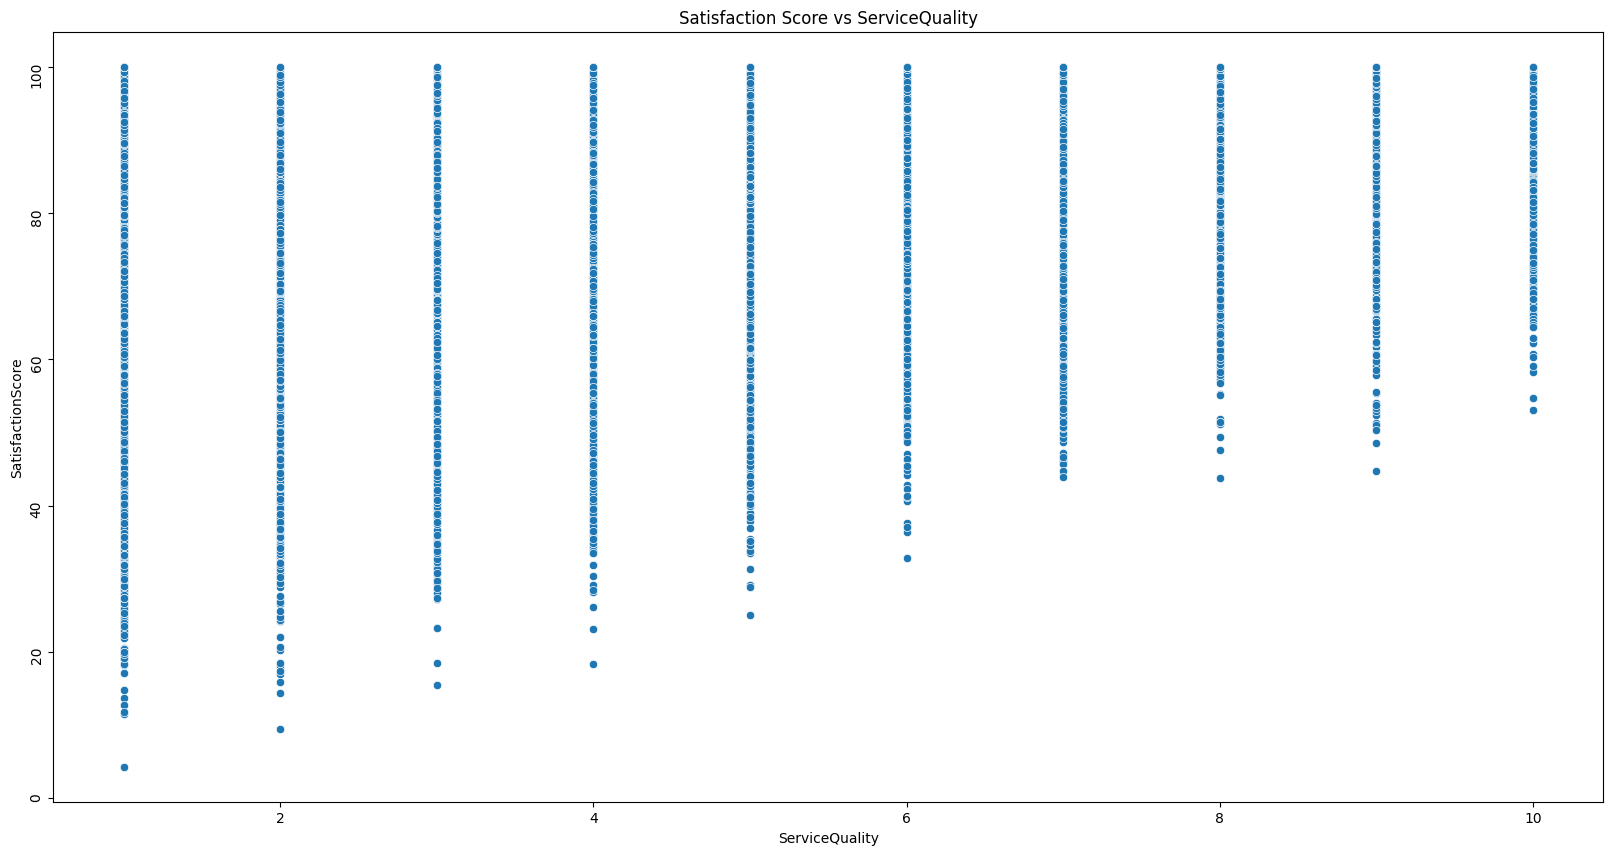

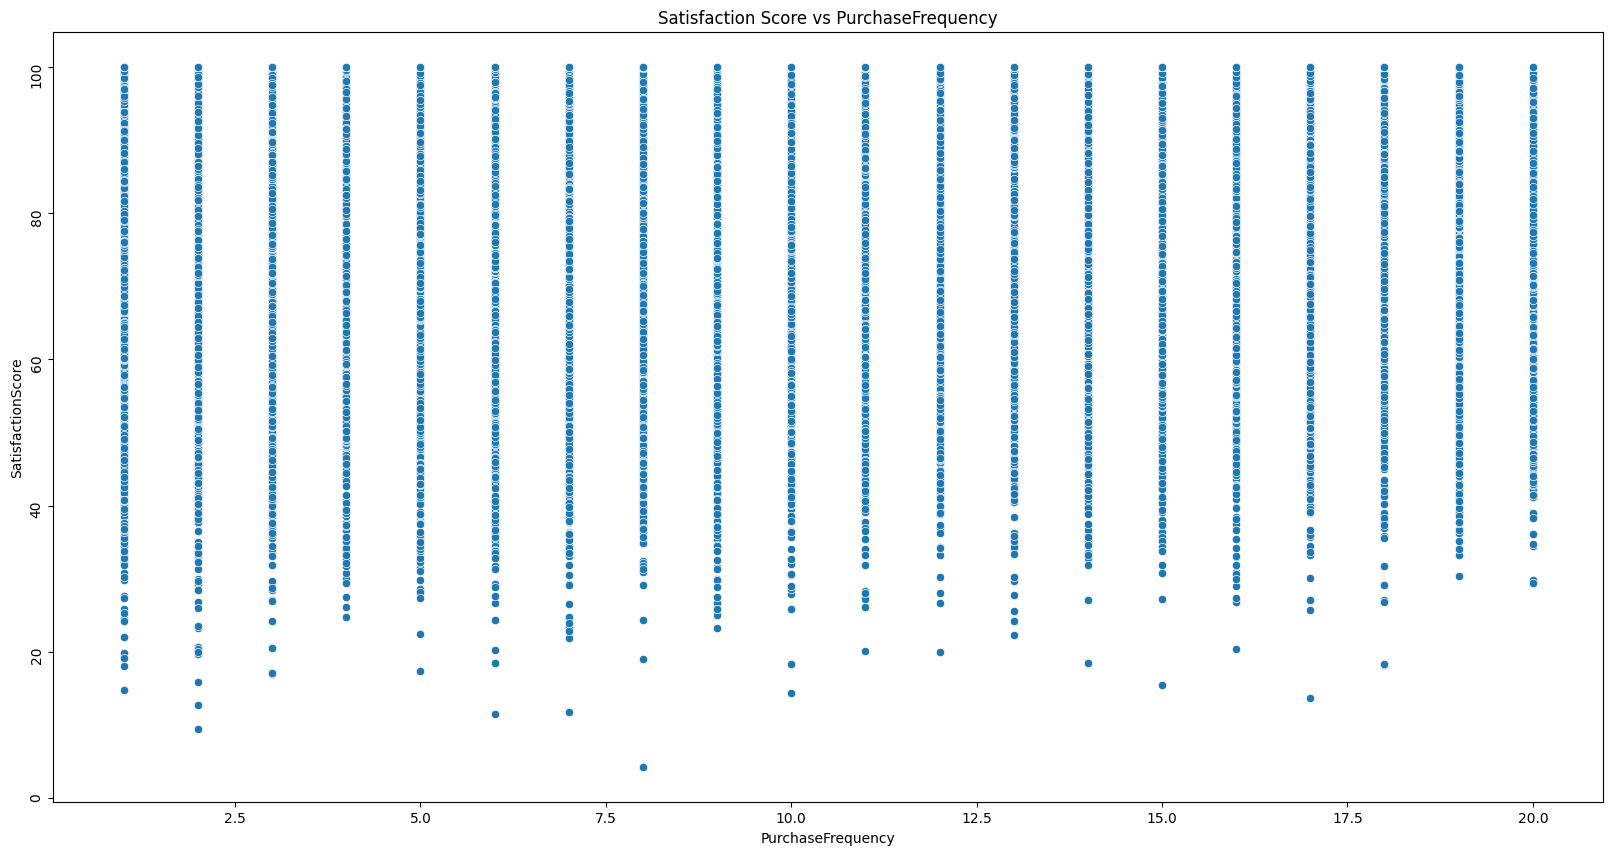

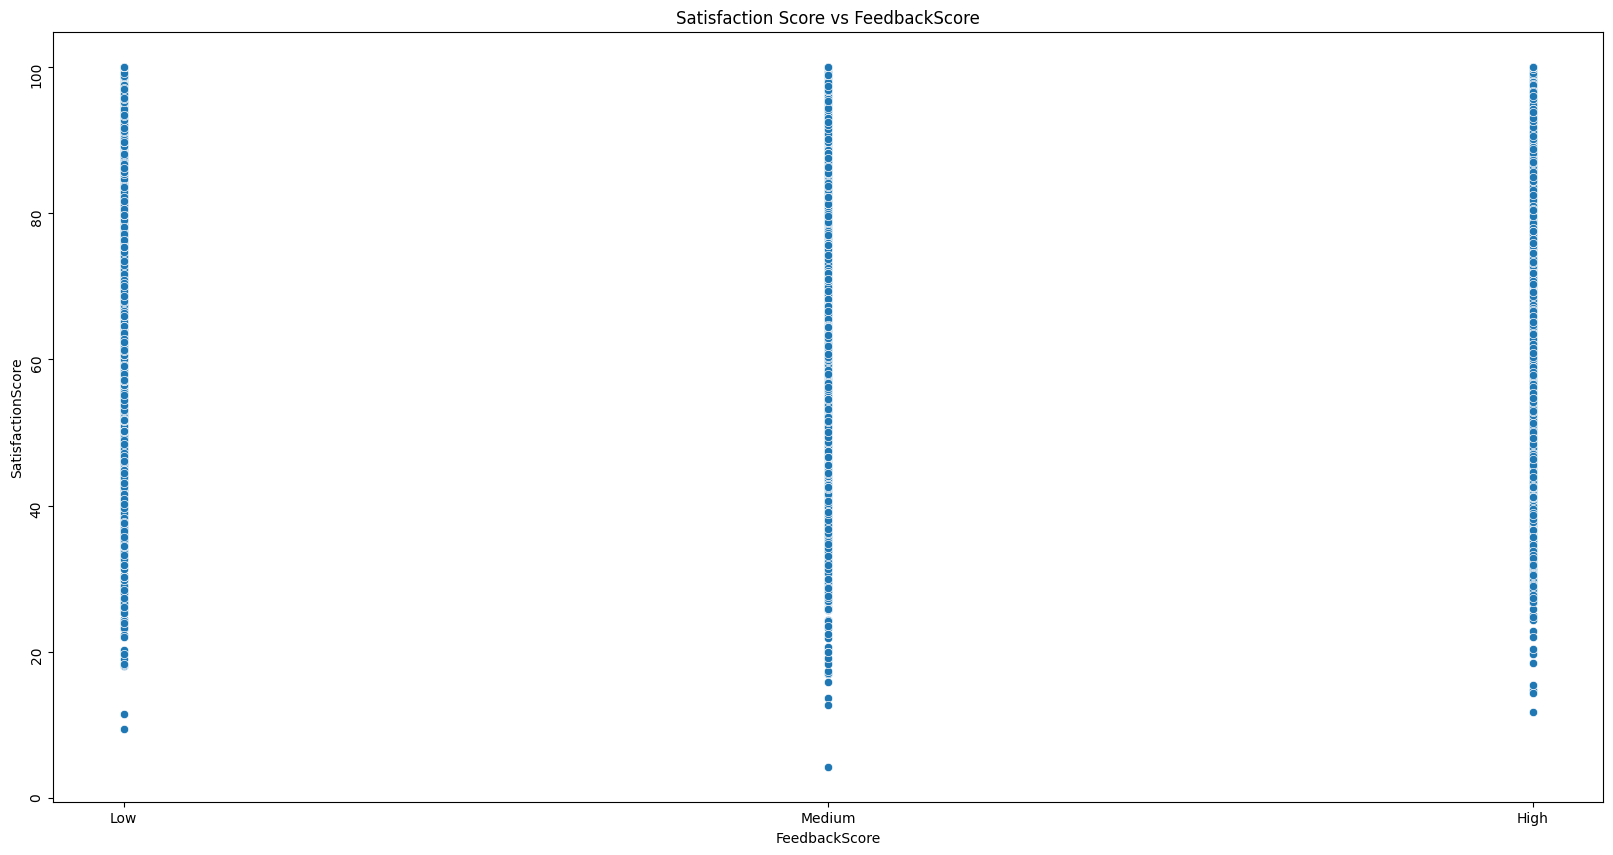

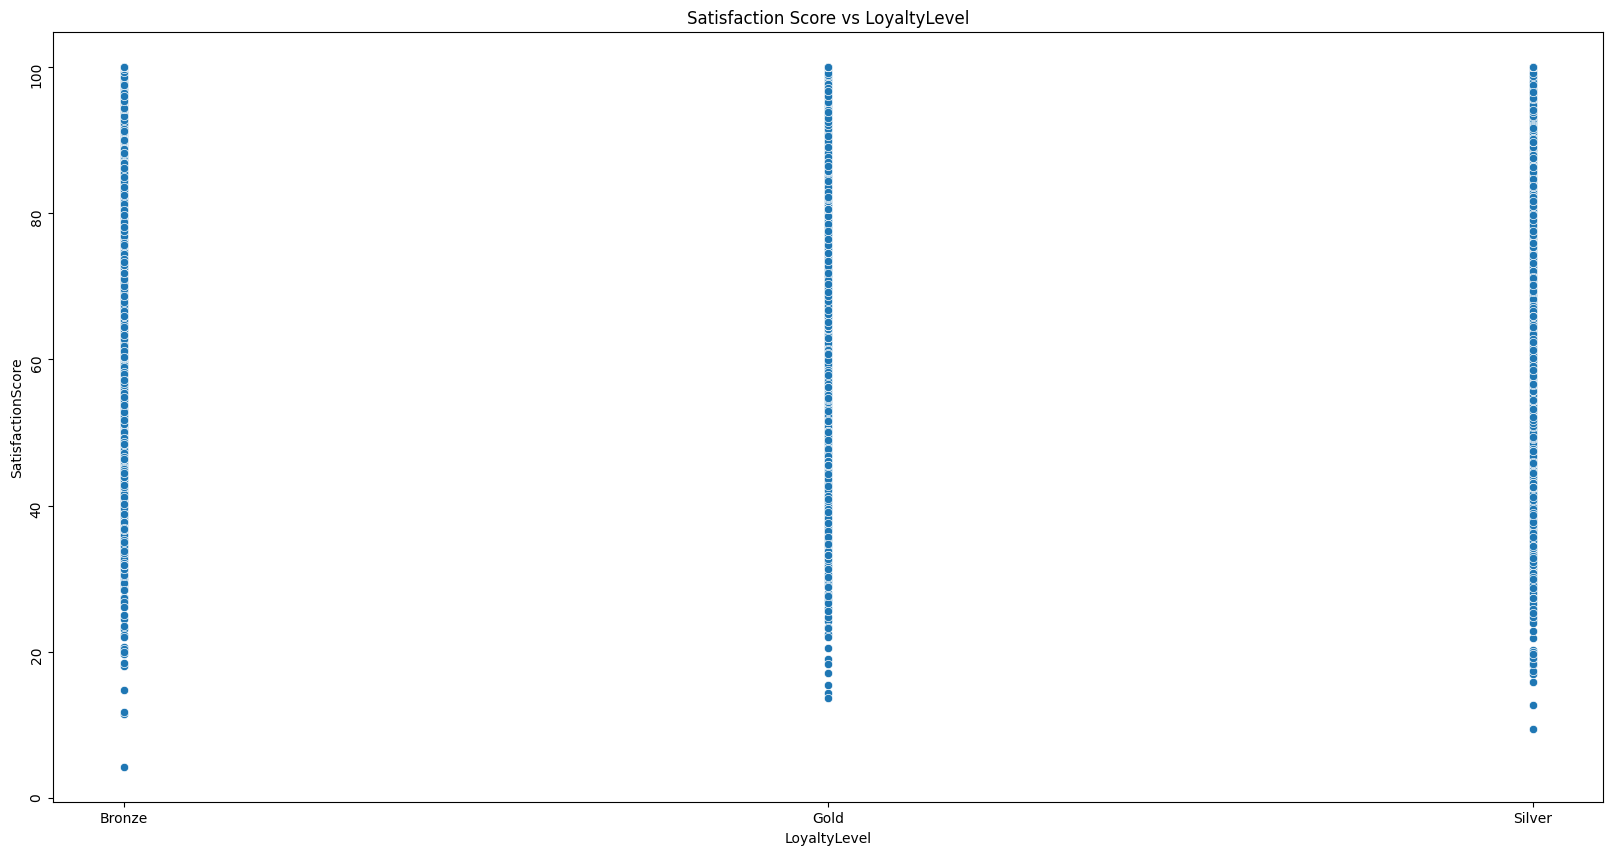

In [9]:
for column in dataset.columns.delete(-1):
    plt.figure(figsize=(20,10))
    sns.scatterplot(dataset, x=column, y='SatisfactionScore')
    plt.title(f'Satisfaction Score vs {column}')
    plt.yticks(rotation=90)
    plt.show()

In [10]:
pd.set_option('future.no_silent_downcasting', True)
dataset['Gender'] = dataset['Gender'].replace({'Male': 1, 'Female': 2})
dataset.head()

,Age,Gender,Country,Income,ProductQuality,ServiceQuality,PurchaseFrequency,FeedbackScore,LoyaltyLevel,SatisfactionScore
0,56,1,UK,83094,5,8,5,Low,Bronze,100.0
1,69,1,UK,86860,10,2,8,Medium,Gold,100.0
2,46,2,USA,60173,8,10,18,Medium,Silver,100.0
3,32,2,UK,73884,7,10,16,Low,Gold,100.0
4,60,1,UK,97546,6,4,13,Low,Bronze,82.0


In [11]:
dataset['FeedbackScore'] = dataset['FeedbackScore'].replace({'Low': 1, 'Medium': 2, 'High': 3})
dataset.head()

,Age,Gender,Country,Income,ProductQuality,ServiceQuality,PurchaseFrequency,FeedbackScore,LoyaltyLevel,SatisfactionScore
0,56,1,UK,83094,5,8,5,1,Bronze,100.0
1,69,1,UK,86860,10,2,8,2,Gold,100.0
2,46,2,USA,60173,8,10,18,2,Silver,100.0
3,32,2,UK,73884,7,10,16,1,Gold,100.0
4,60,1,UK,97546,6,4,13,1,Bronze,82.0


In [12]:
dataset['LoyaltyLevel'] = dataset['LoyaltyLevel'].replace({'Bronze': 1, 'Silver': 2, 'Gold': 3})
dataset.head()

,Age,Gender,Country,Income,ProductQuality,ServiceQuality,PurchaseFrequency,FeedbackScore,LoyaltyLevel,SatisfactionScore
0,56,1,UK,83094,5,8,5,1,1,100.0
1,69,1,UK,86860,10,2,8,2,3,100.0
2,46,2,USA,60173,8,10,18,2,2,100.0
3,32,2,UK,73884,7,10,16,1,3,100.0
4,60,1,UK,97546,6,4,13,1,1,82.0


In [13]:
dataset['Country'] = dataset['Country'].replace({'UK': 1, 'USA': 2, 'Canada': 3, 'France': 4, 'Germany': 5})
dataset.head()

,Age,Gender,Country,Income,ProductQuality,ServiceQuality,PurchaseFrequency,FeedbackScore,LoyaltyLevel,SatisfactionScore
0,56,1,1,83094,5,8,5,1,1,100.0
1,69,1,1,86860,10,2,8,2,3,100.0
2,46,2,2,60173,8,10,18,2,2,100.0
3,32,2,1,73884,7,10,16,1,3,100.0
4,60,1,1,97546,6,4,13,1,1,82.0


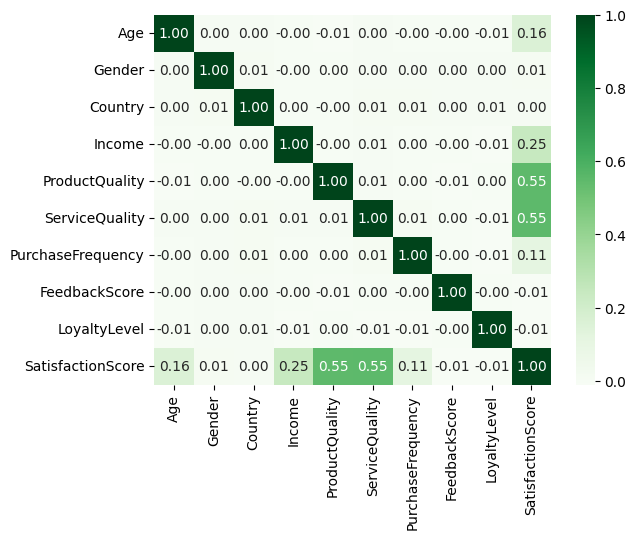

In [14]:
sns.heatmap(dataset.corr(), annot=True, cmap='Greens', fmt='.2f')
plt.show()

In [15]:
features = dataset.drop(columns=['SatisfactionScore'])
target = dataset['SatisfactionScore']

In [16]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.4, random_state=42)

In [17]:
mmax = MinMaxScaler()
features_train = mmax.fit_transform(features_train, target_train)
features_test = mmax.transform(features_test)

In [18]:
mmax = PCA(n_components=0.95)
features_train = mmax.fit_transform(features_train, target_train)
features_test = mmax.transform(features_test)

In [ ]:
model = SVR(kernel='rbf', C=10, epsilon=0.5)
model.fit(features_train, target_train)
predictions = model.predict(features_test)


SVR(C=10, epsilon=0.5)

In [21]:
model.score(features_test, target_test)

0.7859647840939221

In [22]:
target_prediction = model.predict(features_test)

In [23]:
r2_score(target_test, target_prediction)

0.7859647840939221

In [24]:
mean_absolute_error(target_test, target_prediction)

5.406905690987973

In [25]:
root_mean_squared_error(target_test, target_prediction)

7.789005281341693

In [26]:
cross_val_score(model, features_train, target_train).mean()

0.788983052971117

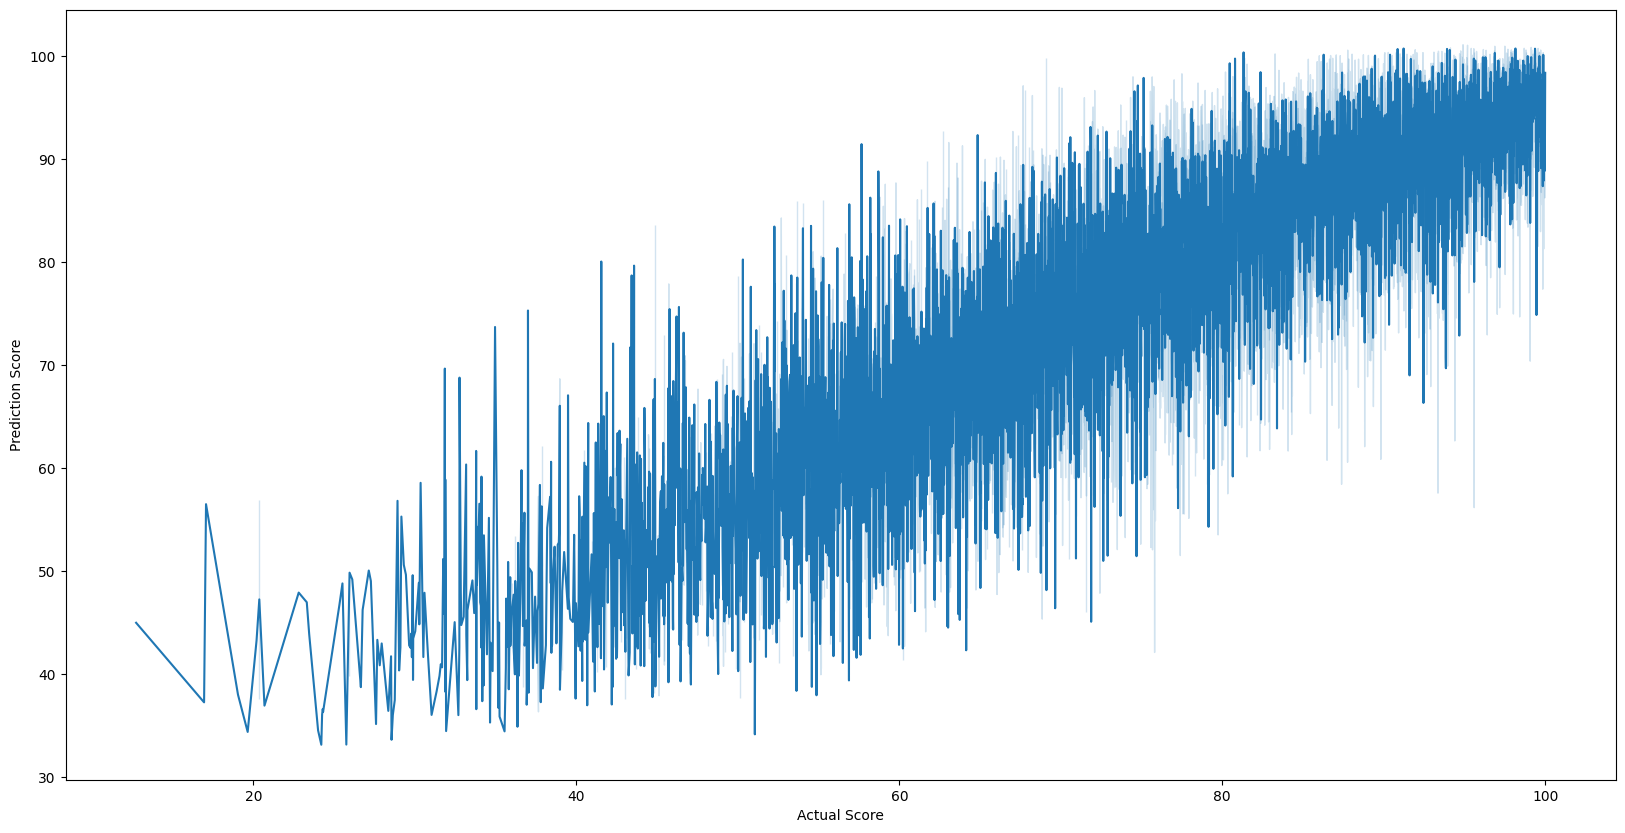

In [27]:
plt.figure(figsize=(20,10))
sns.lineplot(x=target_test, y=target_prediction)
plt.xlabel('Actual Score')
plt.ylabel('Prediction Score')
plt.show()

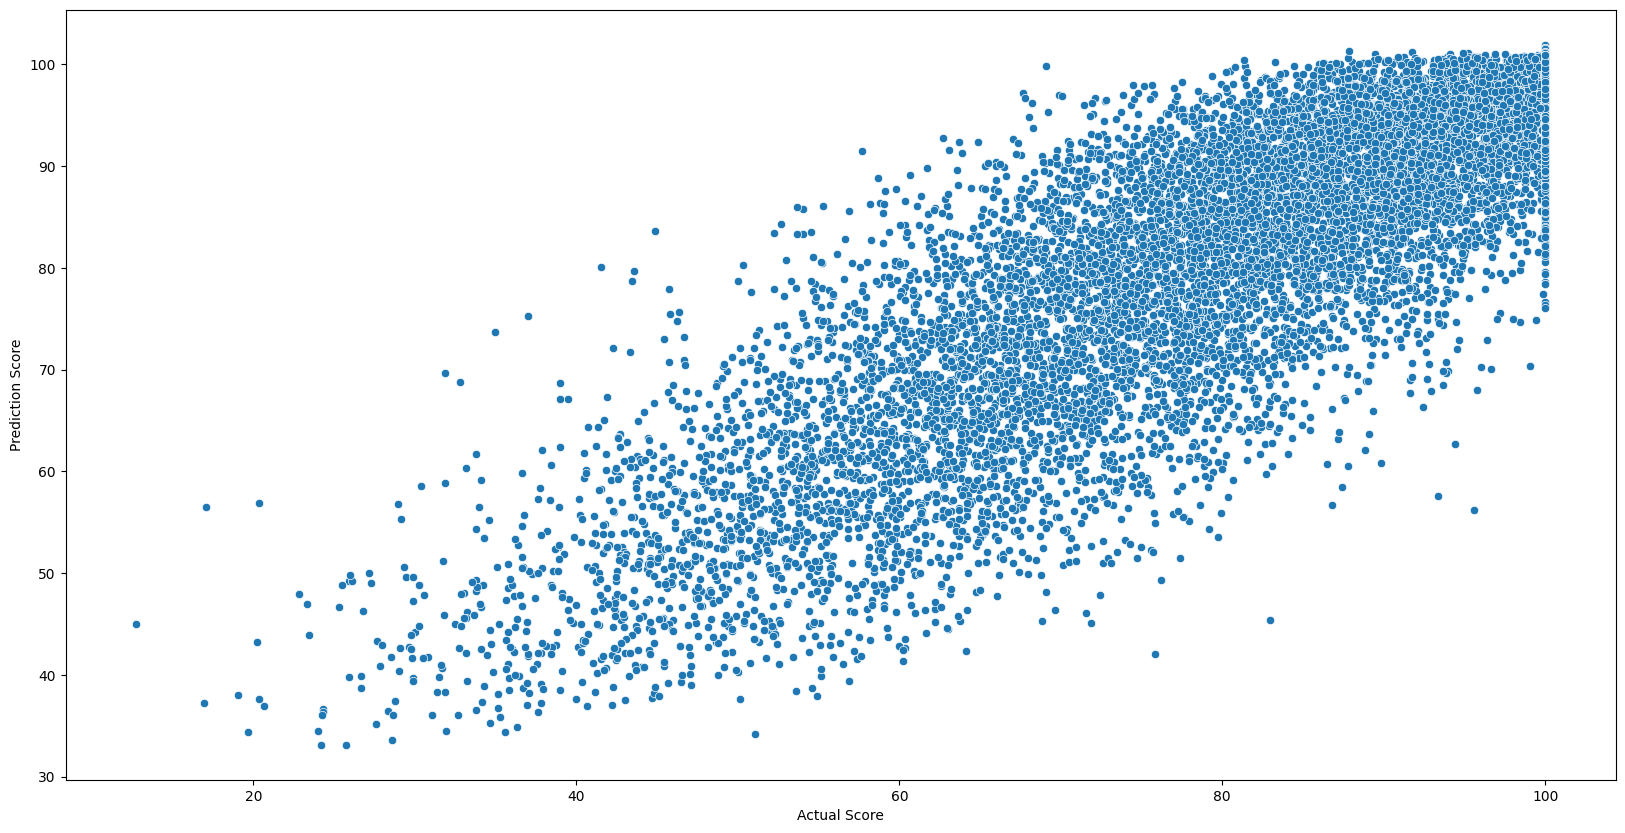

In [28]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=target_test, y=target_prediction)
plt.xlabel('Actual Score')
plt.ylabel('Prediction Score')
plt.show()